In [10]:
import pandas as pd
# Augmented dicker-fuller test
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):

    adft = adfuller(timeseries, autolag='AIC')
    return adft #[1]

#####################################################################################
# windows of trading days
windows = [ 125, 250, 750, 1250]    # 6 months, 1 year, 3 years, 5 years


adfs = []

ticker = "SRG.MI"
#ticker = "FCA.MI"
#ticker = "ENI.MI"
#ticker = "LDO.MI"

df = pd.read_csv("C:\\Dati\\projects\\medium\\data\\%s.csv" % ticker)   # load 20 years historical data

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')    
df.set_index('Date', inplace=True)

print(df['Adj Close'].head())
#print(df.adjusted_close[:period])

#print(len(df.adjusted_close[:period]))
#continue
# augmented dicker fuller test
#adft = adf_test(df.adjusted_close[:period])    # take last "period" samples
#adfs.append({'ticker': ticker, 'adft': 'TF' if adft[1]> 0.05 else 'MR'})
#print(adft)
    

'''    
# save results
f = open('C:\\Dati\\projects\\medium\\adf_results_%s.csv' % period, 'w', newline='\n', encoding='utf-8')
# http://zetcode.com/python/csv/
with f:
    writer = csv.writer(f)
    
    writer.writerow(['ticker', 't-stat','p-value', '5%'])
    for adft in adfs:        
        adt = [adft['ticker'], adft['adft'][0], adft['adft'][1], adft['adft'][4]['5%'] ] 
        writer.writerow(adt)

print("adf results saved!")
'''

Date
2015-01-19    3.212501
2015-01-20    3.215608
2015-01-21    3.210944
2015-01-22    3.324451
2015-01-23    3.335336
Name: Adj Close, dtype: float64


'    \n# save results\nf = open(\'C:\\Dati\\projects\\medium\\adf_results_%s.csv\' % period, \'w\', newline=\'\n\', encoding=\'utf-8\')\n# http://zetcode.com/python/csv/\nwith f:\n    writer = csv.writer(f)\n    \n    writer.writerow([\'ticker\', \'t-stat\',\'p-value\', \'5%\'])\n    for adft in adfs:        \n        adt = [adft[\'ticker\'], adft[\'adft\'][0], adft[\'adft\'][1], adft[\'adft\'][4][\'5%\'] ] \n        writer.writerow(adt)\n\nprint("adf results saved!")\n'

In [11]:
def adf_test(timeseries):
    adft = adfuller(timeseries, autolag='AIC')
    return adft[1]



adf_rolling_lamda = lambda x: ( (1-adf_test(x))*100.0)


for window in windows:
    rolling = df['Adj Close'].rolling(window).apply(adf_rolling_lamda,'raw=False').rolling(window=10).mean()   # rolling window
    print(rolling.dropna().mean())


#adft = adf_test(df['log_ret'].dropna())    # take last "period" samples
#print(1-adft)

59.59790753136802


51.16763865073343


58.79755654135475


54.70173128314742


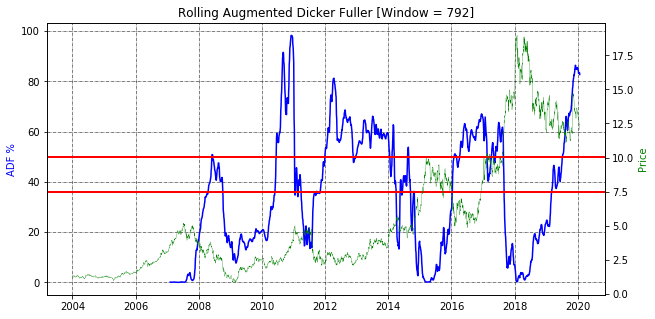

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax1 = plt.subplots(figsize=(10, 5) )

ax1.title.set_text('Rolling Augmented Dicker Fuller [Window = 792]')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)


ax2 = ax1.twinx()

ax2.plot(df.index, df['Adj Close'], 'g-', linewidth=0.3)
ax1.plot(df.index, rolling, 'b-', linewidth=1.5)

#ax1.set_xlabel('X data')
ax2.set_ylabel('Price', color='g')
ax1.set_ylabel('ADF %', color='b')
ax1.axhline(y=50,linewidth=2, color='r')
ax1.axhline(y=rolling.dropna().mean(),linewidth=2, color='r', linestyle='-')


plt.show()

In [193]:
# Hurst Exponent

In [45]:
from hurst import compute_Hc


periods = [125, 250, 750, 1250]    # 6 months, 1 year, 3 years, 5 years
hursts = []
for period in periods:
    # Evaluate Hurst equation
    H, c, data = compute_Hc(df['Adj Close'].dropna()[:period], kind='price', simplified=True)

    print("H={:.4f}, c={:.4f}".format(H,c))
    '''
    print("H={:.4f}, c={:.4f}".format(H,c))

    if H > 0.5:
        print("Hurst - Timeseries is not stationary (trend following)")
    else:
        print("Hurst - Timeseries is stationary (mean reverting)")
    '''
    hursts.append(H*100.0)

# Evaluate Hurst equation on ALL data
H, c, data = compute_Hc(df['Adj Close'].dropna(), kind='price', simplified=True)
hursts.append(H*100.0)
print("H={:.4f}, c={:.4f}".format(H,c))

H=0.5366, c=1.0929
H=0.5141, c=1.1321
H=0.5720, c=1.0542
H=0.5350, c=1.1852
H=0.5427, c=1.1573


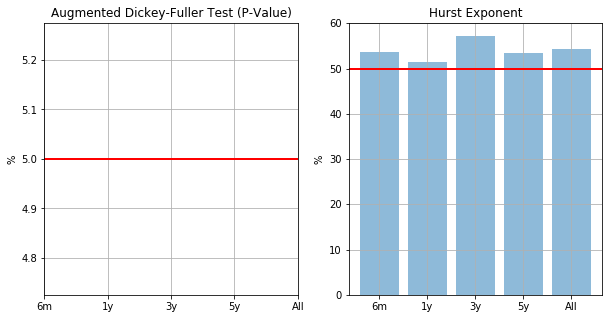

In [46]:
import numpy as np



objects = ( '6m', '1y', '3y', '5y', 'All')
y_pos = np.arange(len(objects))


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


#ax1.bar(y_pos, adfs, align='center', alpha=0.5)
ax1.axhline(y=5,linewidth=2, color='r')

ax1.grid(True)

ax2.bar(y_pos, hursts, align='center', alpha=0.5)
ax2.axhline(y=50,linewidth=2, color='r')

ax2.grid(True)
# Set the ticks and ticklabels for all axes
plt.setp(ax1, xticks=range(len(objects)), xticklabels=objects)
plt.setp(ax2, xticks=range(len(objects)), xticklabels=objects)


ax1.set(ylabel='%')
ax2.set(ylabel='%')

ax1.set_title('Augmented Dickey-Fuller Test (P-Value)')
ax2.set_title('Hurst Exponent')

plt.show()
